<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/BaggingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.datasets import load_iris

In [68]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [69]:
from sklearn.preprocessing import LabelEncoder


In [70]:
le=LabelEncoder()

In [71]:
df['type']=le.fit_transform(df['type'])

In [72]:
df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,type
97,6.2,2.9,4.3,1.3,1
42,4.4,3.2,1.3,0.2,0
36,5.5,3.5,1.3,0.2,0
116,6.5,3.0,5.5,1.8,2
148,6.2,3.4,5.4,2.3,2


In [73]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [74]:
df=df[df['type']!=0][['sepal.width','petal.length','type']]

In [75]:
df

,sepal.width,petal.length,type
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt


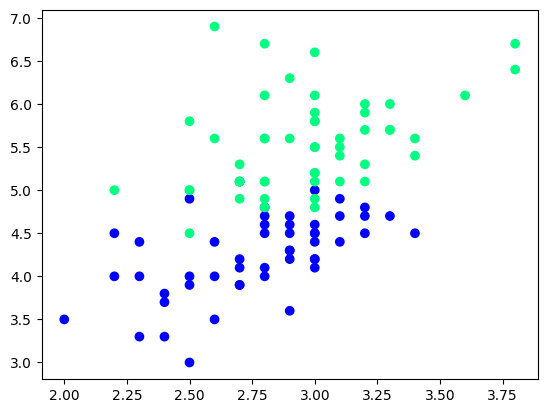

In [77]:
plt.scatter(df['sepal.width'], df['petal.length'],c=df['type'], cmap='winter')

In [78]:
df=df.sample(100)

# data set of 10 rows
df_train=df.iloc[:60,:].sample(10)

# data set for 10 rows fot testing

df_val=df.iloc[60:80,:].sample(10)

df_test=df.iloc[80:,:].sample(5)

In [79]:
X_test=df_val.iloc[:,:2].values
y_test=df_val.iloc[:,2].values

**CASE1-Bagging**

In [80]:
#first Decision Tree
df_bag=df_train.sample(8,replace=True)

In [81]:
df_bag

,sepal.width,petal.length,type
141,3.1,5.1,2
124,3.3,5.7,2
142,2.7,5.1,2
51,3.2,4.5,1
87,2.3,4.4,1
108,2.5,5.8,2
141,3.1,5.1,2
87,2.3,4.4,1


In [82]:
X=df_bag.iloc[:,:2]
y=df_bag.iloc[:,2]

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [84]:
dt_bag1=DecisionTreeClassifier()

In [85]:
def evaluate(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values,y.values,clf=clf,legend=2)
  print(accuracy_score(y_test,clf.predict(X_test)))




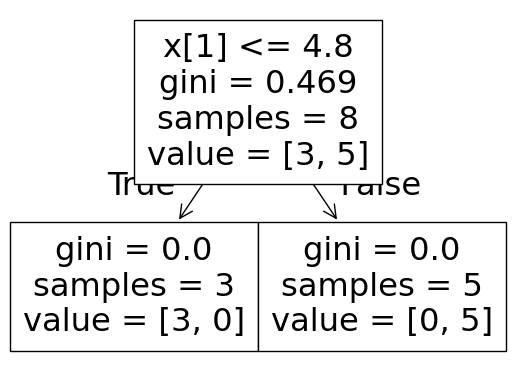

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9


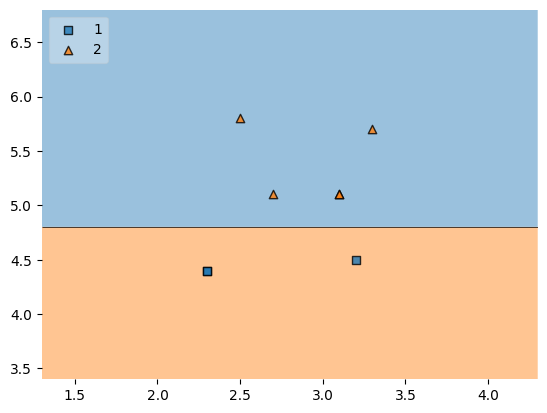

In [86]:
evaluate(dt_bag1,X,y)

     sepal.width  petal.length  type
141          3.1           5.1     2
87           2.3           4.4     1
117          3.8           6.7     2
87           2.3           4.4     1
124          3.3           5.7     2
144          3.3           5.7     2
51           3.2           4.5     1
144          3.3           5.7     2


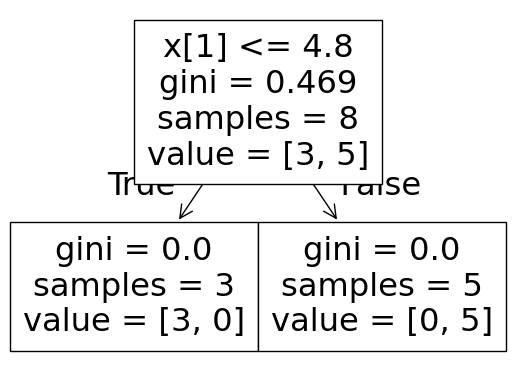

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9


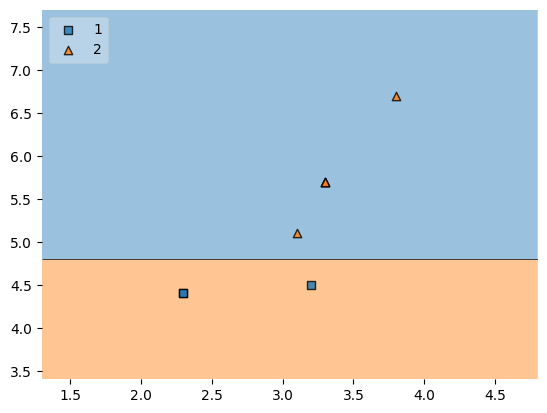

In [87]:
#Second Decision tree
df_bag=df_train.sample(8,replace=True)
print(df_bag)
X=df_bag.iloc[:,:2]
y=df_bag.iloc[:,2]
dt_bag2=DecisionTreeClassifier()

evaluate(dt_bag2,X,y)

     sepal.width  petal.length  type
50           3.2           4.7     1
108          2.5           5.8     2
141          3.1           5.1     2
144          3.3           5.7     2
124          3.3           5.7     2
50           3.2           4.7     1
144          3.3           5.7     2
124          3.3           5.7     2


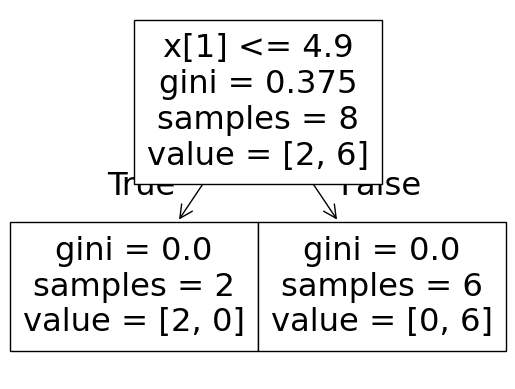

0.9


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


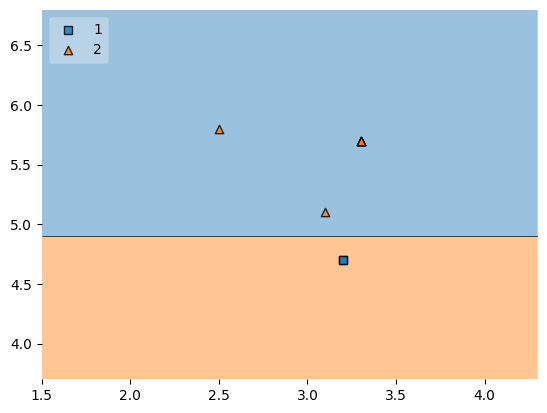

In [88]:
#thrid Decision tree
df_bag=df_train.sample(8,replace=True)
print(df_bag)
X=df_bag.iloc[:,:2]
y=df_bag.iloc[:,2]
dt_bag3=DecisionTreeClassifier()

evaluate(dt_bag3,X,y)

In [89]:
df_test

,sepal.width,petal.length,type
72,2.5,4.9,1
98,2.5,3.0,1
80,2.4,3.8,1
127,3.0,4.9,2
90,2.6,4.4,1


**Pridiction phase**

In [95]:
print("prediction 1", dt_bag1.predict(np.array([2.5,4.9]).reshape(1,2)))
print("prediction 2", dt_bag2.predict(np.array([2.5,4.9]).reshape(1,2)))
print("prediction 3", dt_bag3.predict(np.array([2.5,4.9]).reshape(1,2)))

prediction 1 [2]
prediction 2 [2]
prediction 3 [2]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [96]:
print("prediction 1", dt_bag1.predict(np.array([3.0,4.9]).reshape(1,2)))
print("prediction 2", dt_bag2.predict(np.array([3.0,4.9]).reshape(1,2)))
print("prediction 3", dt_bag3.predict(np.array([3.0,4.9]).reshape(1,2)))

prediction 1 [2]
prediction 2 [2]
prediction 3 [2]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [97]:
df_train

,sepal.width,petal.length,type
141,3.1,5.1,2
92,2.6,4.0,1
124,3.3,5.7,2
117,3.8,6.7,2
142,2.7,5.1,2
144,3.3,5.7,2
51,3.2,4.5,1
108,2.5,5.8,2
87,2.3,4.4,1
50,3.2,4.7,1


Pasting wihtout relacement row sampleing
**bold text**

In [99]:
df_train.sample(8)

,sepal.width,petal.length,type
141,3.1,5.1,2
92,2.6,4.0,1
117,3.8,6.7,2
51,3.2,4.5,1
50,3.2,4.7,1
108,2.5,5.8,2
144,3.3,5.7,2
142,2.7,5.1,2


Random SubSpaces

In [107]:
new_df=pd.read_csv("iris.csv")

In [108]:
new_df.sample(2, replace=True,axis=1)   #column sampling with replacemnt  1st Decison tree

,petal.width,petal.length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
...,...,...
145,2.3,5.2
146,1.9,5.0
147,2.0,5.2
148,2.3,5.4


In [109]:
new_df.sample(2, replace=True,axis=1)   #column sampling with replacemnt

,type,petal.width
0,Setosa,0.2
1,Setosa,0.2
2,Setosa,0.2
3,Setosa,0.2
4,Setosa,0.2
...,...,...
145,Virginica,2.3
146,Virginica,1.9
147,Virginica,2.0
148,Virginica,2.3


In [111]:
new_df.sample(2,axis=1)   #column sampling without replacemnt

,sepal.length,type
0,5.1,Setosa
1,4.9,Setosa
2,4.7,Setosa
3,4.6,Setosa
4,5.0,Setosa
...,...,...
145,6.7,Virginica
146,6.3,Virginica
147,6.5,Virginica
148,6.2,Virginica


**Random Patching**

In [115]:
new_df.sample(8, replace=True).sample(2,replace=True,axis=1)  # with replaxcement column sample

,petal.length,sepal.width
40,1.3,3.5
68,4.5,2.2
102,5.9,3.0
14,1.2,4.0
120,5.7,3.2
8,1.4,2.9
95,4.2,3.0
25,1.6,3.0


In [116]:
new_df.sample(8, replace=True).sample(2,replace=True,axis=1)  # with replaxcement column sample  2nd decison tree

,type,petal.width
39,Setosa,0.2
65,Versicolor,1.4
6,Setosa,0.3
59,Versicolor,1.4
133,Virginica,1.5
88,Versicolor,1.3
10,Setosa,0.2
22,Setosa,0.2
